# Test of neural network
By: Magnus Kvåle Helliesen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neural_network.neural_network import NeuralNetwork

## Setting up a random neural network

In [3]:
nn = NeuralNetwork(100, 100, 2, 2)

## Testing if it learns from only updating the output layer

In [4]:
# Generating a random input array
array1 = np.linspace(0, 1, 100)
array2 = np.linspace(1, 0, 100)

In [5]:
# Without training the neural network does not know how that maps to an output
nn.predict(array1)

array([0.46863706, 0.53136294])

In [6]:
nn.predict(array2)

array([0.4686524, 0.5313476])

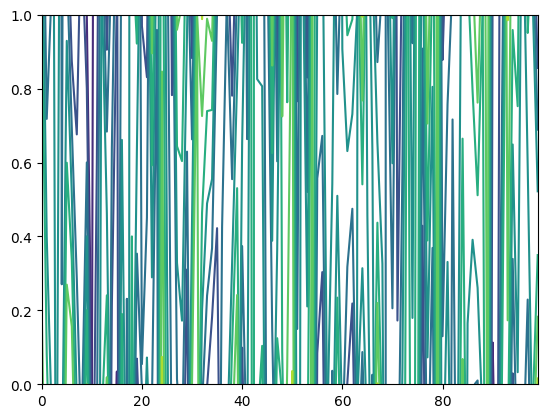

In [7]:
plt.contour(nn.weights[2])

In [8]:
# Making two types of data with some noise
type1_data = tuple(((array1+np.random.normal(size=100)/3, np.array([1, 0])) for _ in range(100)))
type2_data = tuple(((array2+np.random.normal(size=100)/3, np.array([0, 1])) for _ in range(100)))
data = (*type1_data, *type2_data)

In [9]:
# Let's train it
for _ in range(50):
    nn.train(data, 1)

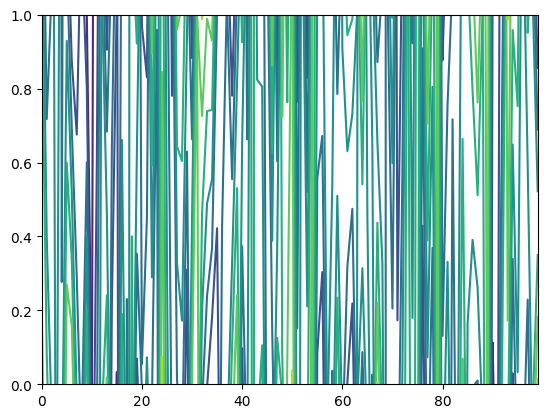

In [10]:
plt.contour(nn.weights[2])

In [11]:
# It already shows improvement
nn.predict(array1)

array([0.500317, 0.499683])

In [12]:
nn.predict(array2)

array([0.49967949, 0.50032051])

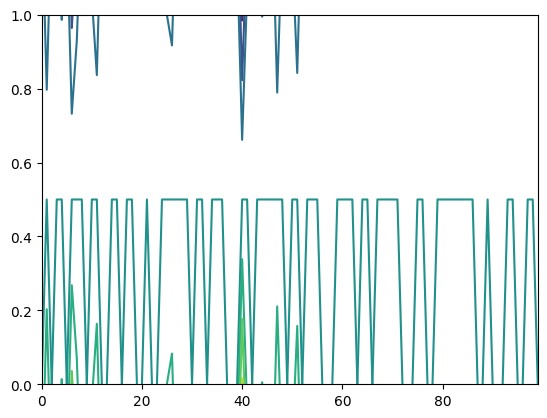

In [16]:
plt.contour(nn.weights[2]-nn._weights0[2])